# Machine Learning

## Random Forests

### What are Random Forests

<div style="text-align: justify">
<img width="60%" class="imgright" src="../images/Random_Forests.webp" srcset="../images/Random_Forests_800w.webp 800w,../images/Random_Forests_700w.webp 700w,../images/Random_Forests_600w.webp 600w,../images/Random_Forests_500w.webp 500w,../images/Random_Forests_400w.webp 400w,../images/Random_Forests_350w.webp 350w,../images/Random_Forests_300w.webp 300w" alt="Random Forest">
<br>
<br>
Tree models are known to be high variance, low bias models. In consequence, they are prone to overfit the training data. This is catchy if we recapitulate what a tree model does if we do not prune it or introduce early stopping criteria like a minimum number of instances per leaf node. Well, it tries to split the data along the features until the instances are pure regarding the value of the target feature, there are no data left, or there are no features left to spit the dataset on. If one of the above holds true, we grow a leaf node. The consequence is that the tree model is grown to the maximal depth and therewith tries to reshape the training data as precise as possible which can easily lead to overfitting. Another drawback of classical tree models like the (ID3 or CART) is that they are relatively unstable. This instability can lead to the situation that a small change in the composition of the dataset leads to a completely different tree model. 
<br>
<br>
For instance, consider the case where a categorically scaled feature *A* is used as the "root node feature". Following, this feature is replaced from the dataset an no longer existent in the sub trees. Now imagine the situation where we replace a single row in the dataset and this change leads to the situation that now feature *B* has the largest information gain or reduction in variance respectively. What does that mean? Well, feature *B* is now preferred over feature *A* as "root node feature" which leads to a completely different tree just because we have altered one single instance in the dataset. This situation may not only occur at the root node but also at all interior nodes of the tree. 
<br>
<br>
<img width="60%" class="imright" src="../images/Unstability_of_tree_models.webp" srcset="../images/Unstability_of_tree_models_800w.webp 800w,../images/Unstability_of_tree_models_700w.webp 700w,../images/Unstability_of_tree_models_600w.webp 600w,../images/Unstability_of_tree_models_500w.webp 500w,../images/Unstability_of_tree_models_400w.webp 400w,../images/Unstability_of_tree_models_350w.webp 350w,../images/Unstability_of_tree_models_300w.webp 300w" alt="The unstability of tree models and how a tree model may change with only a small change in the dataset">
<br>
<br>
Note that in the picture above, the "X" in the target feature column are proposed to be wildcards for the actual values.
The Random Forest approach has proven to be one of the most useful ways to address the issues of overfitting and instability.
<br>
<br>
The Random Forest approach is based on two concepts, called bagging and subspace sampling.  Bagging is the short form for *bootstrap aggregation*. Here we create a multitude of datasets of the same length as the original dataset drawn from the original dataset with replacement (the *bootstrap* in bagging). We then train a tree model for each of the bootstrapped datasets and take the majority prediction of these models for a unseen query instance as our prediction (the *aggregation* in bagging). Here we take the mean or the median for regression tree models and the mode for classification tree models.
<br>
You may ask why we draw samples with replacement? Well, let us assume our original dataset has 100 instances (rows) and we want to create a Random Forest model consisting of 10 trees where each tree is trained on a dataset of the same length as the original dataset. If we now draw 100 samples from our original dataset without replacement, what will happen? Exactly, nothing since we have figuratively speaking simply shifted the dataset from one container into another. If we do this 10 times and train one tree model on each data set, we will get 10 times the exact same dataset (assuming the same model parameters). If we now predict a unseen query instance and average the outcome of the 10 tree models, that is run the random forest procedure, we have nothing won. This brings us back to our initial question why we use the bagging approach? We use the bagging approach (remember the resampling) because we know that the single tree models are very sensitive to changes in the data and have large variances. To address this issue we create multiple models on differently composed datasets and take the average of their predictions. Here we apply the principle that averaging the variance of multiple models reduces the variance.
<img width="60%" clas="imright" src="../images/Variance_of_the_mean.webp" srcset="../images/Variance_of_the_mean_800w.webp 800w,../images/Variance_of_the_mean_700w.webp 700w,../images/Variance_of_the_mean_600w.webp 600w,../images/Variance_of_the_mean_500w.webp 500w,../images/Variance_of_the_mean_400w.webp 400w,../images/Variance_of_the_mean_350w.webp 350w,../images/Variance_of_the_mean_300w.webp 300w" alt="The variance of the mean, illustrated by a gunman who shoots on a butt. A small change in the rifle position may completely change the score but the average of all shots hits the bullseye ">
<br>
We can illustrate this in simplified terms by a gunman which represents the different tree models and is shooting on a target from a relatively large distance. Hence a small movement of the rifle (our dataset) will lead to completely different scores (Output of our model). But averaging the scores hits the bulls eye. This is meant by the variance of the average is less than the variance of the single models ($Var(\bar{X})=\frac{\sigma^2}{n} \ where \ \sigma^2=Var(X))$). 
<br>
<br>
The second concept on which the Random Forest approach is based on, is the concept of subspace sampling. Bagging advanced us towards our goal of having a more powerful model creating more accurate results. Unfortunately it turns out that the bagged models are correlated and hence often relatively equal. That is, based on the correlation they produce similar results. This can be reduced to the fact that the bagging is using the whole feature set (all the descriptive features) for each model. Now assume that there are one or two very strong features which surmounts all the others (e.g. the information gain is much much larger for these two features as for the others) in terms of "predictiveness".
Even if we change the composition of the data by sampling with replacement, these two are likely to remain the dominant features and hence will serve as the root node or the first hidden node layer respectively. In consequence, the trees look all quite similar.
<br>
<img width="60%" class="imright" src="../images/Bagging_Subspace_sampling.webp" srcset="../images/Bagging_Subspace_sampling_800w.webp 800w,../images/Bagging_Subspace_sampling_700w.webp 700w,../images/Bagging_Subspace_sampling_600w.webp 600w,../images/Bagging_Subspace_sampling_500w.webp 500w,../images/Bagging_Subspace_sampling_400w.webp 400w,../images/Bagging_Subspace_sampling_350w.webp 350w,../images/Bagging_Subspace_sampling_300w.webp 300w" alt="The procedure of bagging and subspace sampling necessary to create a Random Forest model ">
<br>
Now it turns out that it is possible that there are structures hidden in data which get lost if we use pure bagging. To evoke these hidden structures we must reinforce other than those two strong features to give them a voice to vote. How can we do that? Well, the simplest approach is to just move those two from our dataset. Obviously this is no good idea since we want to have them but also want to consider and incorporate the voice (votes) of the not so dominant features. To make a long story short, we do this by randomly drawing a number of $m\subset{p}$ different features for each split in the trees where $p$ denotes the feature space at each split. Here the literature recommends $m=\sqrt{p}$.The combination of the bagging and the subspace sampling gives us the desired Random Forest model whose mystery is the assumption that a large number of weak learners are better in terms of prediction accuracy than one strong learner - or why do you think that the "ask the audience lifeline" is set as a lifeline in the *who wants to be the millionaire* show?? -. **Done - Congratulations! you now know the concept behind random forest.** which are among the most powerful machine learning algorithms. 

</div>

### The maths behind Random Forests

<div style="text-align: justify">
Luckily there is mostly no such thing as a "Random Forest" specific math which we haven't seen before. The underlying maths is in principle the same as for [Classification-](https://www.python-course.eu/Decision_Trees.php) and [Regression-Trees](https://www.python-course.eu/Regression_Trees.php).
<br>
The main difference with Random Forests is that we do all the step we have done at Decision- and Regression Trees multiple times. That is, we grow a multitude of trees, let them make decisions and aggregate these decisions by taking the most frequently (mode) decision if we have a categorically scaled target feature and the mean or the median if we have a continuously scaled target feature. Hence for a categorically scaled target feature:
$\underset{t \ \in \ T}{\operatorname{argmax}} \ treemodels$ where $\operatorname{argmax}$ stands for the mode (majority vote), $t$ represents the outcome (prediction) of a single tree model, $T$ is the result space created by the tree models (all outcomes) and $treemodels$ are the single tree models where each produces a outcome $t$. Hence the most frequently occurring outcome $t \ \in \ T$ is returned as prediction.
<br>
</div>

#### Random Forest Pseudocode

<div style="text-align: justify">
As stated above, the Random Forest algorithm is based on a combination of the principles of bootstrap aggregation and subspace sampling. Hence:
</div>

### Random Forests from scratch with Python 

<div style="text-align: justify">
Luckily for a Random Forest classification model we can use most of the Classification Tree code created in the [Classification Tree](https://www.python-course.eu/Decision_Trees.php) chapter (The same holds true for Random Forest regression models). The only real change we have to implement in the actual tree-building code is that we use at each split a random feature sample of size $m=\sqrt{p}$ where $p$ denotes the feature space at this node. 
All other changes are made "around" the tree building code. That is, from a code perspective, the Random Forest is created by giving the tree-code kind of a nice "super hero suite". 
<br>
<img width="60%" class="imright" src="../images/Random_Forests_Random_Forest_Super_Suite.webp" srcset="../images/Random_Forests_Random_Forest_Super_Suite_800w.webp 800w,../images/Random_Forests_Random_Forest_Super_Suite_700w.webp 700w,../images/Random_Forests_Random_Forest_Super_Suite_600w.webp 600w,../images/Random_Forests_Random_Forest_Super_Suite_500w.webp 500w,../images/Random_Forests_Random_Forest_Super_Suite_400w.webp 400w,../images/Random_Forests_Random_Forest_Super_Suite_350w.webp 350w,../images/Random_Forests_Random_Forest_Super_Suite_300w.webp 300w" alt="Shows a tree model which kind of wears a superhero suite and therewith becomes a random forest ">
<br>
<br>
The third change we have to implement is that the Random Forest model actually can not be visualized like a normal tree model and hence the visualization part is obsolete event though, internally each tree is build and we actually could plot each single tree to reason the decision of the Random Forest model. Though, this is not useful when the number of tree models grows to the hundreds or thousands.
<br>
The forth change is that we have to add a list in which the predictions of the single tree models are stored to finally return the mode value of that list as prediction.
<br> 
Here, only the changes in the tree-building code due to the creation of the Random Forest are commented. For further comments on the tree-building code itself, the reader is referred to the [Classification Tree](https://www.python-course.eu/Decision_Trees.php) chapter.
For the sake of visualization we will use the [UCI mushroom dataset](https://archive.ics.uci.edu/ml/datasets/mushroom) here.
</div>

In [3]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np
from pprint import pprint
import scipy.stats as sps



dataset = pd.read_csv('data\mushroom.csv',header=None)
dataset = dataset.sample(frac=1)
dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']

print(dataset["target"])
input()

###########################################################################################################
########################################################################################################### 


def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


########################################################################################################### 
###########################################################################################################


def InfoGain(data,split_attribute_name,target_name="target"):
    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
       
###########################################################################################################
###########################################################################################################


def ID3(data,originaldata,features,target_attribute_name="target",parent_node_class = None):
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        
        ################################################################################################################
        ############!!!!!!!!!Implement the subspace sampling. Draw a number of m = sqrt(p) features!!!!!!!!#############
        ###############################################################################################################
        
        
        
        
        features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
        
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    
    
                
###########################################################################################################
###########################################################################################################

    
def predict(query,tree,default = 'p'):
        
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

        
        

###########################################################################################################
###########################################################################################################

def train_test_split(dataset):
    training_data = dataset.iloc[:round(0.75*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[round(0.75*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data


training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 



###########################################################################################################
###########################################################################################################



#######Train the Random Forest model###########

def RandomForest_Train(dataset,number_of_Trees):
    #Create a list in which the single forests are stored
    random_forest_sub_tree = []
    
    #Create a number of n models
    for i in range(number_of_Trees):
        #Create a number of bootstrap sampled datasets from the original dataset 
        bootstrap_sample = dataset.sample(frac=1,replace=True)
        
        #Create a training and a testing datset by calling the train_test_split function
        bootstrap_training_data = train_test_split(bootstrap_sample)[0]
        bootstrap_testing_data = train_test_split(bootstrap_sample)[1] 
        
        
        #Grow a tree model for each of the training data
        #We implement the subspace sampling in the ID3 algorithm itself. Hence take a look at the ID3 algorithm above!
        random_forest_sub_tree.append(ID3(bootstrap_training_data,bootstrap_training_data,bootstrap_training_data.drop(labels=['target'],axis=1).columns))
        
    return random_forest_sub_tree


        
random_forest = RandomForest_Train(dataset,50)

 

#######Predict a new query instance###########
def RandomForest_Predict(query,random_forest,default='p'):
    predictions = []
    for tree in random_forest:
        predictions.append(predict(query,tree,default))
    return sps.mode(predictions)[0][0]


query = testing_data.iloc[0,:].drop('target').to_dict()
query_target = testing_data.iloc[0,0]
print('target: ',query_target)
prediction = RandomForest_Predict(query,random_forest)
print('prediction: ',prediction)



#######Test the model on the testing data and return the accuracy###########
def RandomForest_Test(data,random_forest):
    data['predictions'] = None
    for i in range(len(data)):
        query = data.iloc[i,:].drop('target').to_dict()
        data.loc[i,'predictions'] = RandomForest_Predict(query,random_forest,default='p')
    accuracy = sum(data['predictions'] == data['target'])/len(data)*100
    #print('The prediction accuracy is: ',sum(data['predictions'] == data['target'])/len(data)*100,'%')
    return accuracy
        
        
        
RandomForest_Test(testing_data,random_forest)



3161    p
611     e
6573    p
113     e
4453    p
       ..
6726    p
2308    e
7455    e
4940    p
3362    p
Name: target, Length: 8124, dtype: object



<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
<ipython-input-3-568084ca0f39>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

target:  p
prediction:  e


90.49729197439686

c:\users\tobia\python\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


The prediction accuracy is:  78.72968980797637 %
The prediction accuracy is:  76.71097981290005 %
The prediction accuracy is:  82.7178729689808 %
The prediction accuracy is:  92.66371245691778 %
The prediction accuracy is:  88.13392417528311 %
The prediction accuracy is:  90.00492368291482 %
The prediction accuracy is:  89.51255539143278 %
The prediction accuracy is:  89.51255539143278 %
The prediction accuracy is:  85.37666174298376 %
The prediction accuracy is:  88.33087149187593 %
The prediction accuracy is:  80.20679468242245 %
The prediction accuracy is:  89.85721319547021 %
The prediction accuracy is:  89.75873953717381 %
The prediction accuracy is:  89.561792220581 %
The prediction accuracy is:  90.15263417035942 %
The prediction accuracy is:  89.75873953717381 %
The prediction accuracy is:  92.31905465288035 %
The prediction accuracy is:  88.87247661250616 %
The prediction accuracy is:  90.98966026587888 %
The prediction accuracy is:  89.36484490398819 %
The prediction accuracy

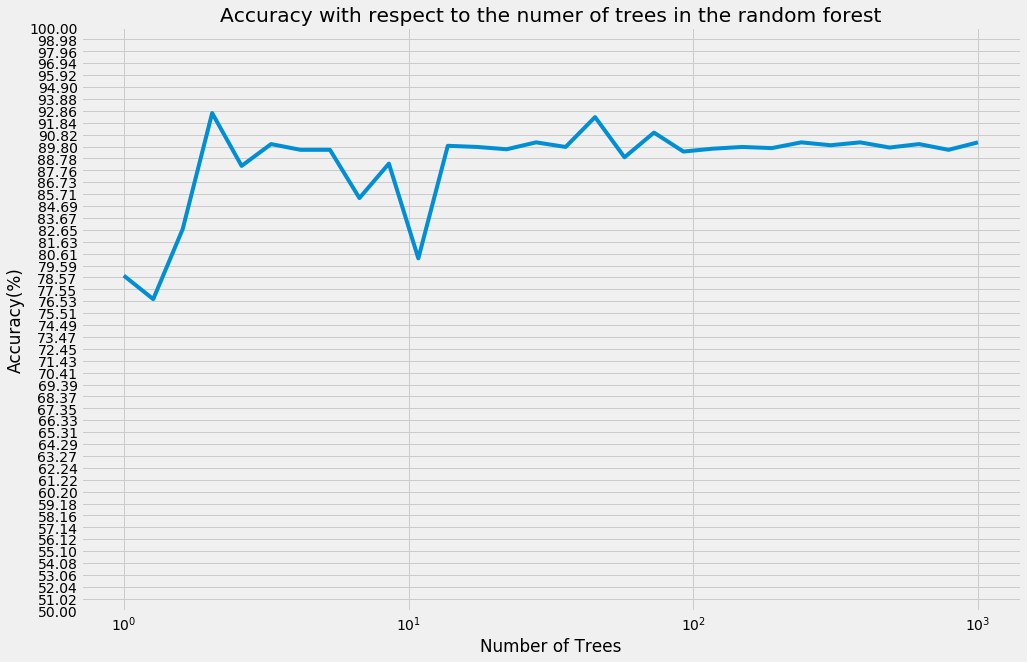

In [5]:
##############################################################################################################
##########Plot the prediction accuracy with respect to the number of Trees in the random forests#############
##############################################################################################################
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(111)

accuracy = []

for i in range(1,11,1):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))

for i in range(10,110,10):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))

for i in range(100,1100,100):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))

print(accuracy)
ax0.plot(np.logspace(0,3,30),accuracy)
ax0.set_yticks(np.linspace(50,100,50))
ax0.set_title("Accuracy with respect to the numer of trees in the random forest")
ax0.set_xscale('log')
ax0.set_xlabel("Number of Trees")
ax0.set_ylabel('Accuracy(%)')

plt.show()
    
    

<img width="60%" class="imright" src="../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees.webp" srcset="../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_800w.webp 800w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_700w.webp 700w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_600w.webp 600w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_500w.webp 500w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_400w.webp 400w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_350w.webp 350w,../images/Random_Forests_Accuracy_of_Random_Forest_with_respect_to_the_number_of_trees_300w.webp 300w" alt="Shows the Accuracy of the Random FOrest model with respect to the number of decision trees in the Random Forest model ">

<div style="text-align: justify">
Given the dataset and this kind of model we achieve an accuracy of about 90% which is quite good considering that our model is "hard coded from scratch" and neither a highly optimized nor robust Random Forest model. We also have not altered the number of randomly selected features *m* per split which is also a parameter which can have an effect on the prediction accuracy. 
<br>
As we can see, the accuracy curve flattens out once the number of trees grows to large n (mind the logarithmic scaled x-axis). Though Random Forest modelS are said to kind of "cannot overfit the data" a further increase in the number of trees will not further increase the accuracy of the model. Nevertheless, one drawback of Random Forest models is that they take relatively long to train especially if the number of trees is set to a very high number. Irrespective of this drawback, for instance Caruana and Niculescu-Mizil 2006 *(An Empirical Comparison of Supervised Learning Algorithms)* have shown that Random Forest models often have very good predictive accuracy compared to other supervised learning algorithms. 
</div>

### Random Forests using sklearn

we will now use the prepackaged sklearn Random Forest classification model [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict).

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

#Encode the feature values which are strings to integers
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])


X = dataset.drop(['target'],axis=1)
Y = dataset['target']


#Instantiate the model with 100 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=100,criterion="entropy")


#Cross validation
accuracy = cross_validate(Random_Forest_model,X,Y,cv=10)['test_score']
print('The accuracy is: ',sum(accuracy)/len(accuracy)*100,'%')



The accuracy is:  100.0 %


Well, Bull's eye!

#### References

+ https://www.youtube.com/watch?v=QHOazyP-YlM
+ http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/ensembles/RandomForests.pdf
+ https://stats.stackexchange.com/questions/295868/why-is-tree-correlation-a-problem-when-working-with-bagging/295883
+ Trevor Hastie, Robert Tibshirani, Jerome Friedman, 2008. *The Elements of Statistical Learning*. Stanford, CA: Springer.
+ Max Kuhn, Kjell Johnson, 2016. *Applied Predictive Modeling*. Groton, Connecticut, Saline, Michigan: Springer.